In [1]:
import matplotlib.pyplot as plt
import numpy as np

try:
    import SafeRLBench as srb
    import SafeRLBench.envs as envs
    import SafeRLBench.tools as tools
except ImportError:
    import sys
    import os
    module_path = os.path.abspath('..')
    sys.path.append(module_path)
    import SafeRLBench as srb
    import SafeRLBench.envs as envs
    import SafeRLBench.tools as tools
    
np.set_printoptions(precision=5)

In [2]:
lincar = envs.LinearCar()
executer = tools.Rollout(lincar, max_it=100, abort=False)

policy_par = lambda par: (lambda x: par[0] + par[1:].dot(x))

#policy_par = lambda par: (lambda x: np.exp(par[0] - par[1:].dot(x)) - 1.5)

policy = tools.Policy(policy_par,(3))
optimizer = srb.PolicyGradient(executer, lincar, estimator='central_fd', max_it=1000, eps=0.0001,  
                       parameter_domain=np.array([-1,1]), rate = 0.2)
optimizer.estimator.var = 0.5

In [22]:
par, conv = optimizer.optimize(policy)

Start Central Finite Differences optimization:
Initial Parameters: [ 0.5447   0.54725  0.33186]
Run: 0  	Parameter: 	[ 0.5447   0.54725  0.33186]	Reward: -1466.30352663
		Gradient: 	[-18.24423  -3.76076  -0.65937]
Run: 10  	Parameter: 	[-1.95235 -7.53203 -0.14394]	Reward: -129.642688591
		Gradient: 	[ 0.2031  -0.04628  0.03078]
		Average Time: 	0.13s/step
Run: 20  	Parameter: 	[-1.40492 -7.65212 -0.15653]	Reward: -121.071762824
		Gradient: 	[ 0.34093 -0.07245 -0.03614]
		Average Time: 	0.15s/step
Run: 30  	Parameter: 	[-0.80711 -7.7221  -0.17172]	Reward: -112.326145576
		Gradient: 	[ 0.30685 -0.01865 -0.00876]
		Average Time: 	0.13s/step
Run: 40  	Parameter: 	[-0.19117 -7.7466  -0.18328]	Reward: -102.912935545
		Gradient: 	[ 0.29723 -0.00442 -0.00209]
		Average Time: 	0.13s/step
Run: 50  	Parameter: 	[ 0.31636 -7.74586 -0.18632]	Reward: -96.5900183715
		Gradient: 	[ 0.21775  0.00451 -0.00361]
		Average Time: 	0.13s/step
Run: 60  	Parameter: 	[ 0.75213 -7.73117 -0.19809]	Reward: -91.880

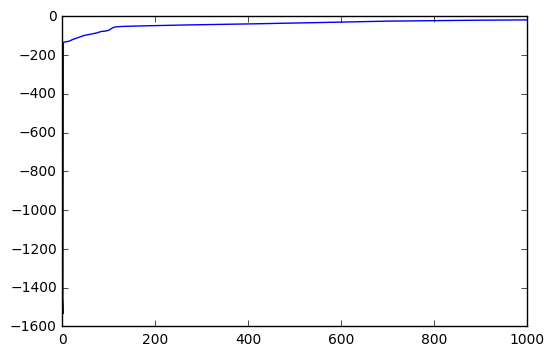

In [23]:
rewards = optimizer.rewards
plt.plot(np.arange(0,len(rewards)),rewards)
plt.show()

Best Parameter:	[ 2.62423 -2.69224 -9.32663]
Best Reward: 	-17.8517800303


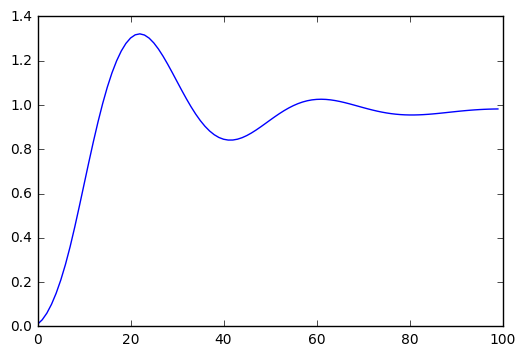

In [24]:
print("Best Parameter:\t"+str(optimizer.best_parameter))
print("Best Reward: \t"+str(optimizer.best_reward))

policy.setParameter(optimizer.best_parameter)
trace, i, achieved = executer.rollout(policy)

y = np.array([t[0] for t in [s[1] for s in trace]])
x = np.arange(0,i+1)

plt.plot(x,y)
plt.show()

In [5]:
policy_par = lambda par: (lambda x: par[0] + par[1:].dot(x))

#policy_par = lambda par: (lambda x: np.exp(par[0] - par[1:].dot(x)) - 1.5)

policy = tools.Policy(policy_par,(3))
optimizer = srb.PolicyGradient(executer, lincar, estimator='forward_fd', max_it=1000, eps=0.0001,  
                       parameter_domain=np.array([-1,1]), rate = 0.2)
optimizer.estimator.var = 0.5

In [6]:
par, conv = optimizer.optimize(policy)

KeyboardInterrupt: 

In [ ]:
rewards = optimizer.rewards
plt.plot(np.arange(0,len(rewards)),rewards)
plt.show()

Best Parameter: [  5.54976  -6.31094 -10.8346 ]
Best Reward: -27.5753021636


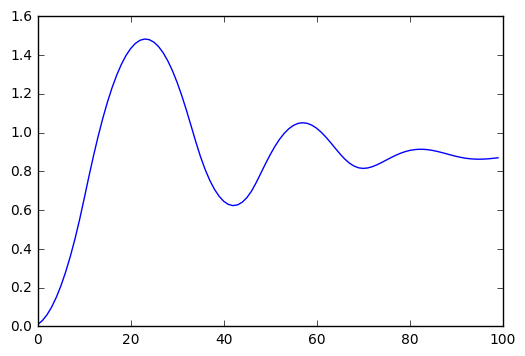

In [8]:
print("Best Parameter: "+str(optimizer.best_parameter))
print("Best Reward: "+str(optimizer.best_reward))

policy.setParameter(optimizer.best_parameter)
trace, i, achieved = executer.rollout(policy)

y = np.array([t[0] for t in [s[1] for s in trace]])
x = np.arange(0,i+1)

plt.plot(x,y)
plt.show()